In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

print("Path to dataset files:", path)

100%|██████████| 292k/292k [00:00<00:00, 20.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4


In [3]:
!dir /root/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4

car\ data.csv  CAR\ DETAILS\ FROM\ CAR\ DEKHO.csv  Car\ details\ v3.csv  car\ details\ v4.csv


In [4]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4/car data.csv')

# Add Age column (assuming current year is 2023)
df['Age'] = 2023 - df['Year']


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Age
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,9.372093
std,2.891554,5.082812,8.644115,38886.883882,0.247915,2.891554
min,2003.000000,0.100000,0.320000,500.000000,0.000000,5.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,7.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,9.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,11.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,20.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
 9   Age            301 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 23.6+ KB


In [7]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,5
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,8
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,8
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,7
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0,8


In [8]:
df['Owner'].value_counts()

,count
Owner,
0,290
1,10
3,1


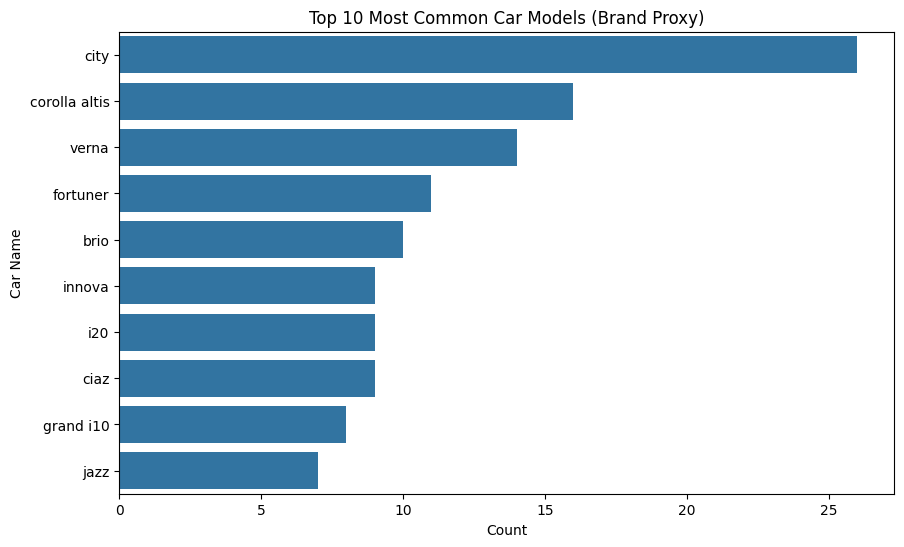

In [9]:

# Exploratory Data Analysis (EDA)
# 1. Most common car brands (using Car_Name as brand proxy)
plt.figure(figsize=(10,6))
car_name_counts = df['Car_Name'].value_counts().head(10)
sns.barplot(x=car_name_counts.values, y=car_name_counts.index)
plt.title('Top 10 Most Common Car Models (Brand Proxy)')
plt.xlabel('Count')
plt.ylabel('Car Name')
plt.show()



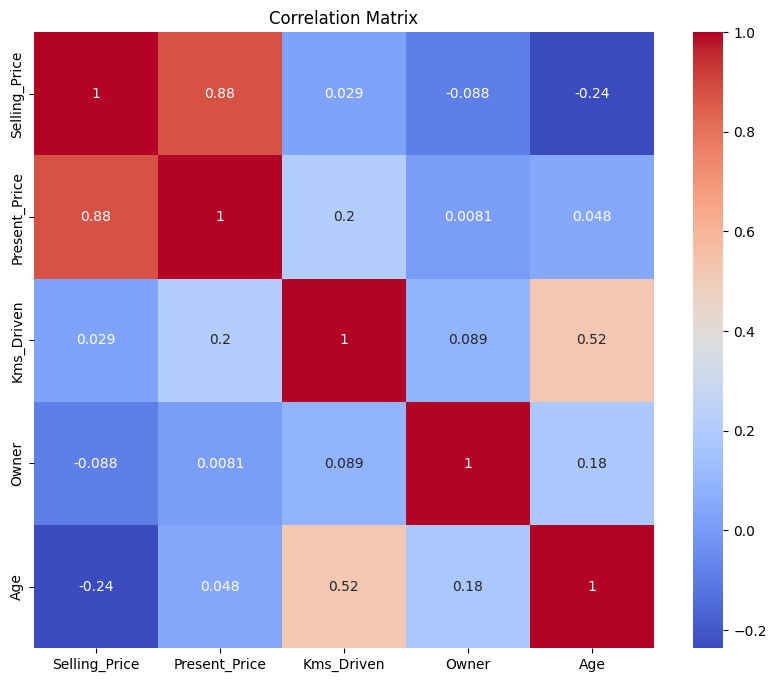

In [10]:
# 2. Correlation analysis
numerical_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Age']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### Verdict : Age, Present Price mainly determine the selling price

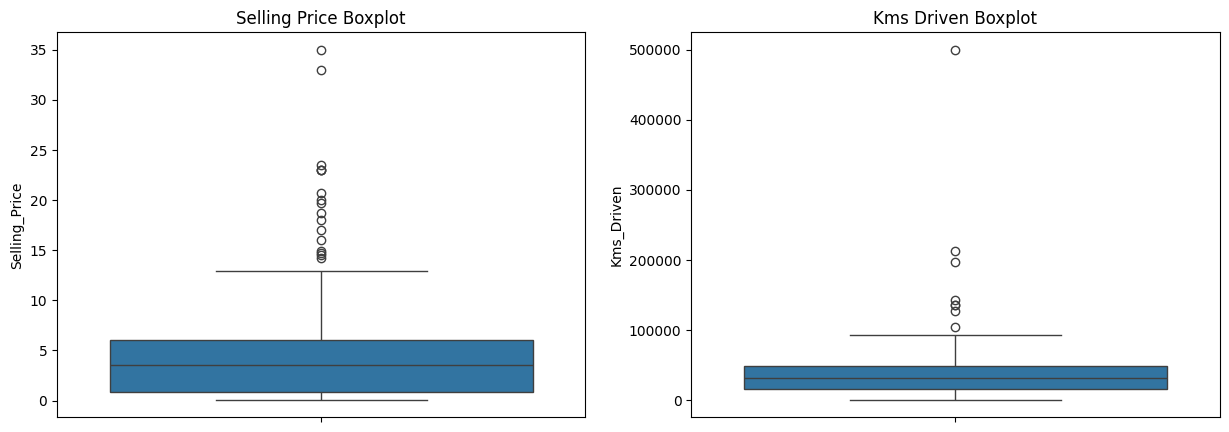

In [11]:

# 3. Outlier detection
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=df['Selling_Price'])
plt.title('Selling Price Boxplot')
plt.subplot(1,2,2)
sns.boxplot(y=df['Kms_Driven'])
plt.title('Kms Driven Boxplot')
plt.show()


In [ ]:
Q1 = df['Kms_Driven'].quantile(0.25)
Q3 = df['Kms_Driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Kms_driven'] < lower_bound) | (df['Kms_driven'] > upper_bound)]
print("Outliers in km_driven:", outliers.shape[0])

In [12]:

# Preprocessing
X = df.drop(['Selling_Price', 'Year'], axis=1)
y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 5.3 MB/s eta 0:00:00


In [14]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.linear_model import LassoCV
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor

# # Column Transformer
# numerical_cols = ['Present_Price', 'Kms_Driven', 'Owner', 'Age']
# categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Car_Name']

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_cols),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
#     ])

# lasso = LassoCV()
# rf_regressor = RandomForestRegressor()
# xgb_regressor = XGBRegressor()

# # Define hyperparameters for RandomizedSearchCV

# param_dist_rf = {
#     'regressor__n_estimators': [100,125,150],
#     'regressor__max_depth': [20, 30],
#     'regressor__min_samples_split': [2, 3,5],
#     'regressor__bootstrap': [True, False],
# }

# param_dist_xgb = {
#     'regressor__learning_rate': [0.01, 0.1, 0.2],
#     'regressor__n_estimators': [100, 200],
#     'regressor__max_depth': [3, 6, 10],
#     'regressor__subsample': [0.8, 1.0],
#     'regressor__colsample_bytree': [0.8, 1.0],
#     'regressor__gamma': [0, 0.1, 0.3]
# }


In [15]:
# def get_random_search(model, param_dist):
#     return RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)


# # Random Forest pipeline
# pipeline_rf = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', rf_regressor)
# ])

# random_search_rf = get_random_search(rf_regressor, param_dist_rf)

# # XGBRegressor pipeline
# pipeline_xgb = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', xgb_regressor)
# ])

# random_search_xgb = get_random_search(xgb_regressor, param_dist_xgb)

# # Example train-test split (replace with your own data)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # X, y are your features and target

# # Fit RandomizedSearchCV for RandomForestRegressor
# random_search_rf = get_random_search(pipeline_rf, param_dist_rf)  # Use pipeline_rf here
# random_search_rf.fit(X_train, y_train)
# print("Best parameters for Random Forest:", random_search_rf.best_params_)
# print("Best score for Random Forest:", random_search_rf.best_score_)


Best parameters for Random Forest: {'regressor__n_estimators': 100, 'regressor__min_samples_split': 3, 'regressor__max_depth': 30, 'regressor__bootstrap': True}
Best score for Random Forest: 0.8715226570977744


In [16]:
# # prompt: use grid search cv to do extensive search over random forest regressor

# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for RandomForestRegressor
# param_grid_rf = {
#     'regressor__n_estimators': [50, 75,100,],
#     'regressor__max_depth': [14,25,35,50],
#     'regressor__min_samples_split': [2,3,5],
# }

# # Create GridSearchCV object for RandomForestRegressor
# grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

# # Fit GridSearchCV for RandomForestRegressor
# grid_search_rf.fit(X_train, y_train)

# # Print the best hyperparameters and score
# print("Best parameters for Random Forest:", grid_search_rf.best_params_)
# print("Best score for Random Forest:", grid_search_rf.best_score_)


Best parameters for Random Forest: {'regressor__max_depth': 35, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 50}
Best score for Random Forest: -1.6519324588502464


In [17]:
rfr = RandomForestRegressor(n_estimators =117, max_depth = 35,min_samples_split=3,min_samples_leaf = 2)
preprocessed_data = preprocessor.fit_transform(X_train)
rfr.fit(preprocessed_data, y_train)
preprocessed_data_test = preprocessor.transform(X_test)
y_pred = rfr.predict(preprocessed_data_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")

R-squared: 0.9611499865653673
RMSE: 0.946008862584221
MSE: 0.8949327680878915


In [18]:

# # Fit RandomizedSearchCV for XGBregressor
# random_search_xgb = get_random_search(pipeline_xgb, param_dist_xgb)
# random_search_xgb.fit(X_train, y_train)
# print("Best parameters for XBG:", random_search_xgb.best_params_)
# print("Best score for ", random_search_xgb.best_score_)

Best parameters for XBG: {'regressor__subsample': 0.8, 'regressor__n_estimators': 200, 'regressor__max_depth': 6, 'regressor__learning_rate': 0.2, 'regressor__gamma': 0, 'regressor__colsample_bytree': 1.0}
Best score for  0.9244244861319288


In [19]:
xgb_reg = XGBRegressor(n_estimators =125, learning_rate = 0.2, subsample = 0.8 , max_depth = 5)
preprocessed_data = preprocessor.fit_transform(X_train)
xgb_reg.fit(preprocessed_data, y_train)
preprocessed_data_test = preprocessor.transform(X_test)
y_pred = xgb_reg.predict(preprocessed_data_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")

R-squared: 0.9605391814016074
RMSE: 0.9534164997854362
MSE: 0.9090030220631127


# Car details from cardekho


In [21]:
!ls /root/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4/

'car data.csv'	'CAR DETAILS FROM CAR DEKHO.csv'  'Car details v3.csv'	'car details v4.csv'


In [22]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4/CAR DETAILS FROM CAR DEKHO.csv')

In [23]:
df.head(7)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner


In [37]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [25]:
df2 = pd.read_csv('/root/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4/Car details v3.csv')

In [27]:
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


<Axes: >

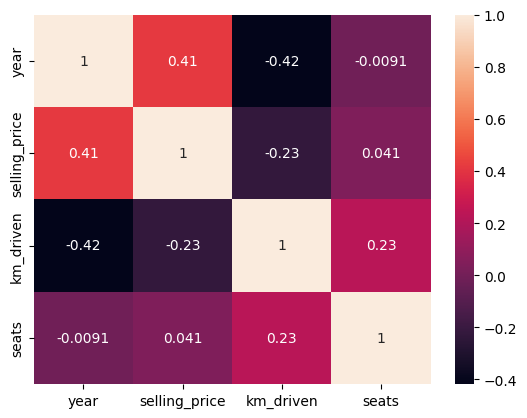

In [35]:
sns.heatmap(df2[['year','selling_price','km_driven','seats']].corr(), annot=True)

In [39]:
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [45]:
df['age'] = 2025 - df['year']

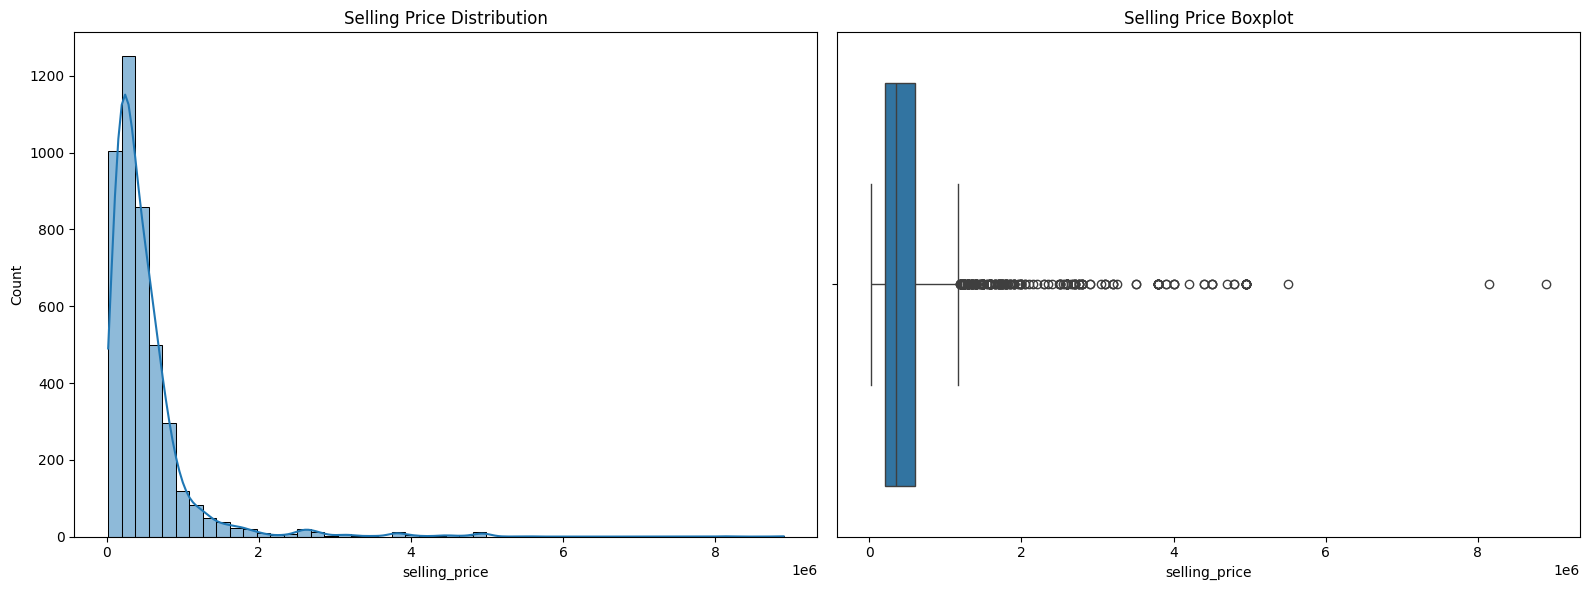

In [40]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['selling_price'], kde=True, bins=50)
plt.title('Selling Price Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['selling_price'])
plt.title('Selling Price Boxplot')
plt.tight_layout()
plt.show()


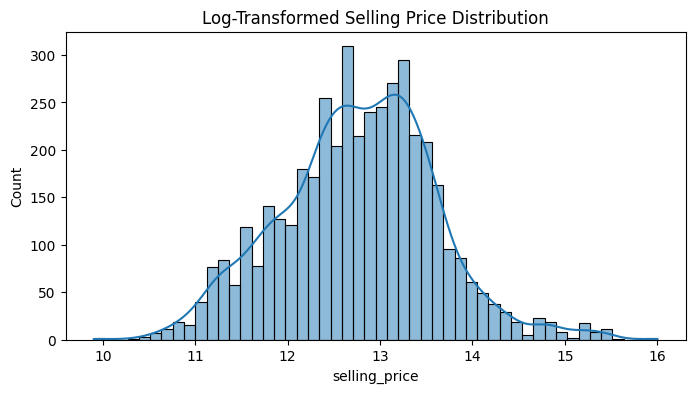

In [41]:
# Log-transformed view
plt.figure(figsize=(8, 4))
sns.histplot(np.log1p(df['selling_price']), kde=True, bins=50)
plt.title('Log-Transformed Selling Price Distribution')
plt.show()

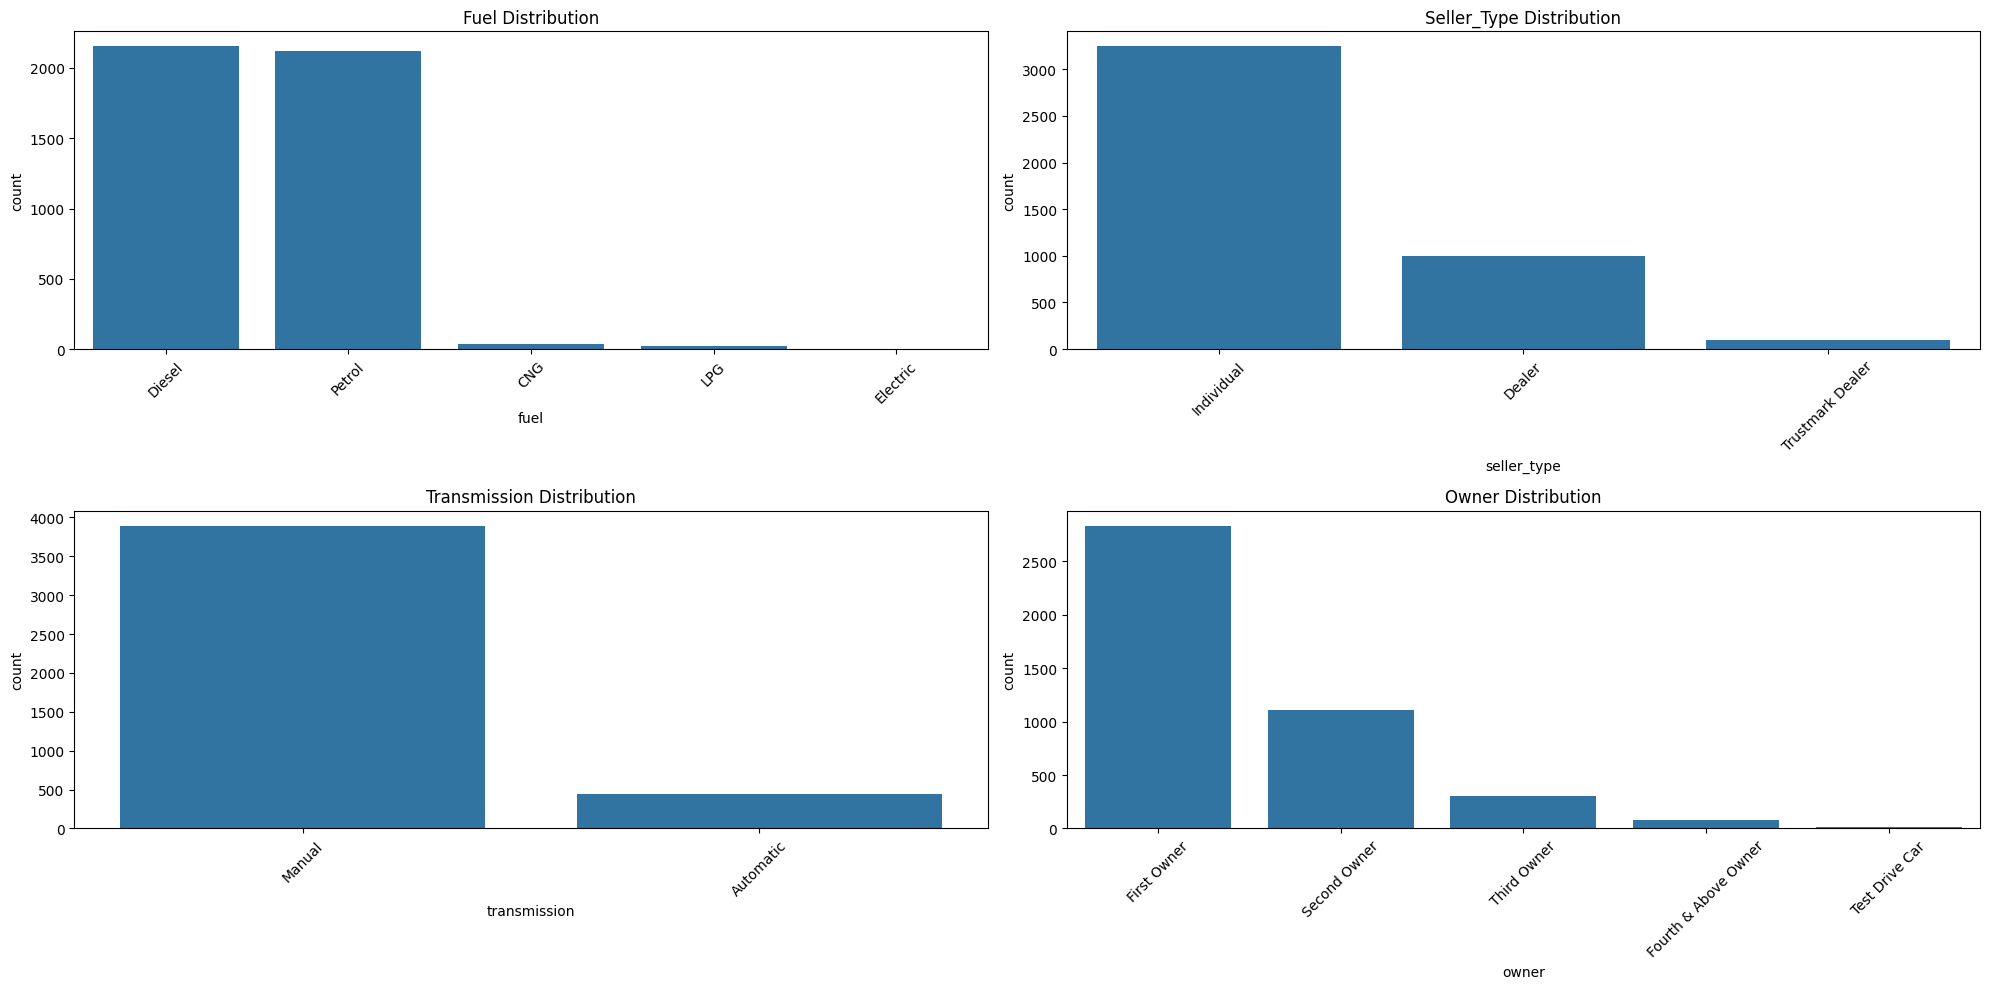

In [42]:
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner']

plt.figure(figsize=(20, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'{col.title()} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


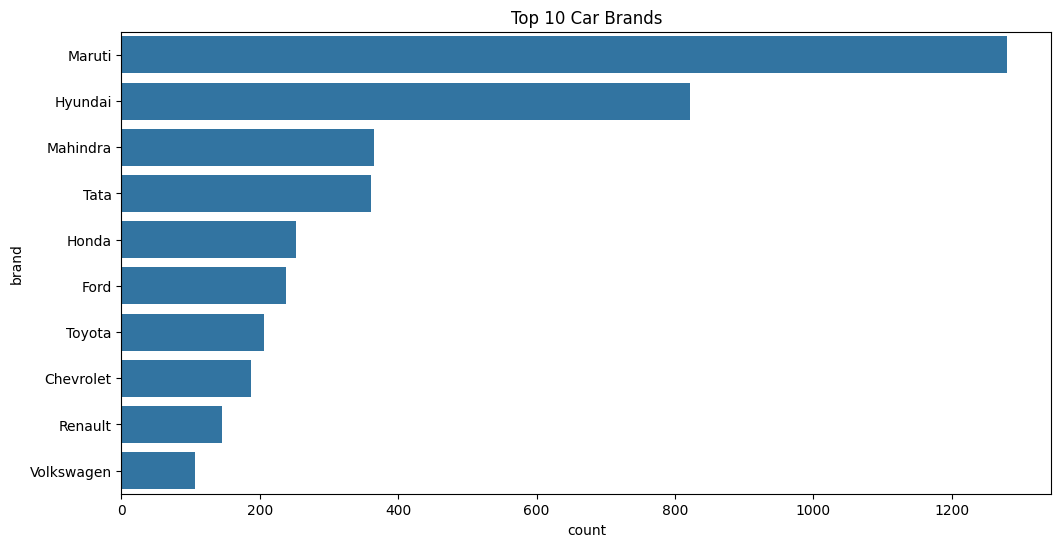

In [43]:
df['brand'] = df['name'].apply(lambda x: x.split()[0])
top_brands = df['brand'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 6))
sns.countplot(y='brand', data=df, order=top_brands)
plt.title('Top 10 Car Brands')
plt.show()

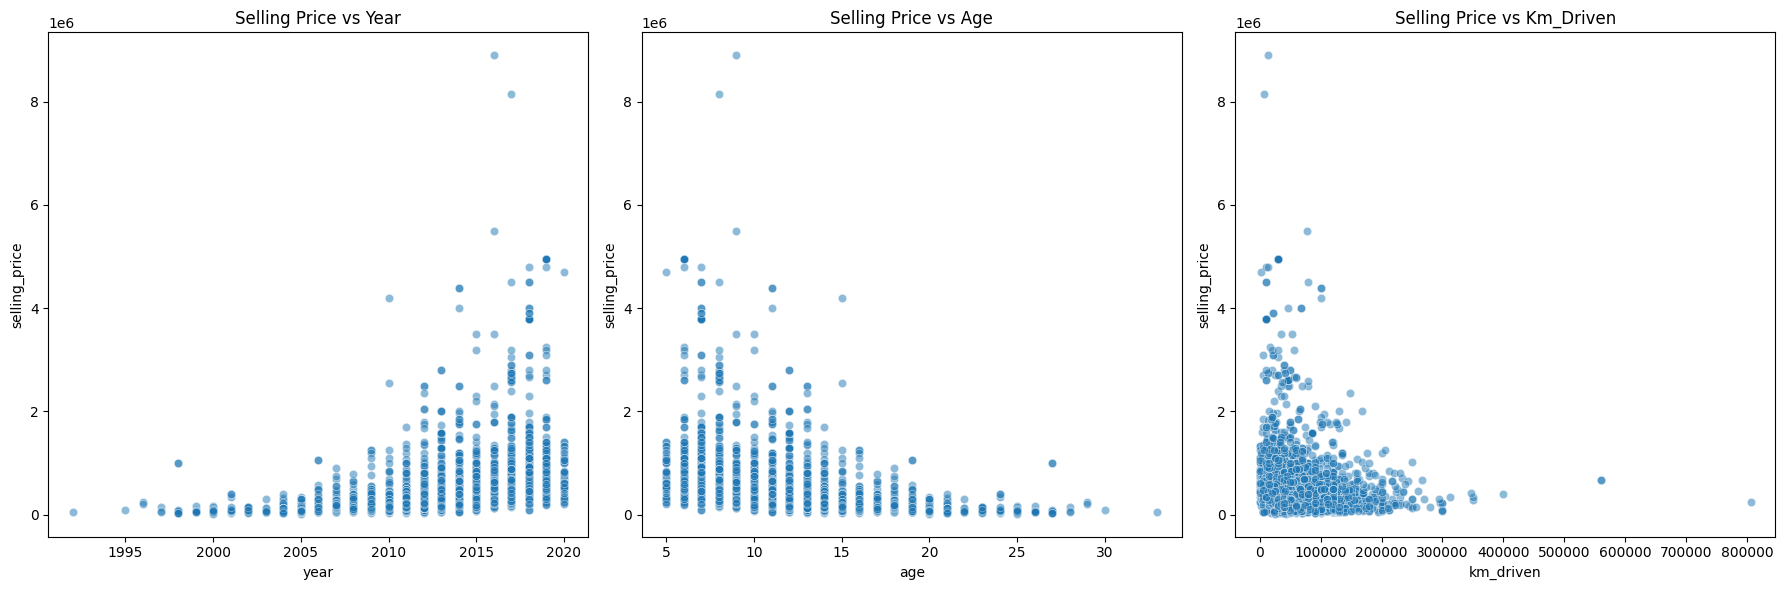

In [46]:
num_cols = ['year', 'age', 'km_driven']

plt.figure(figsize=(18, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=col, y='selling_price', data=df, alpha=0.5)
    plt.title(f'Selling Price vs {col.title()}')
plt.tight_layout()
plt.show()

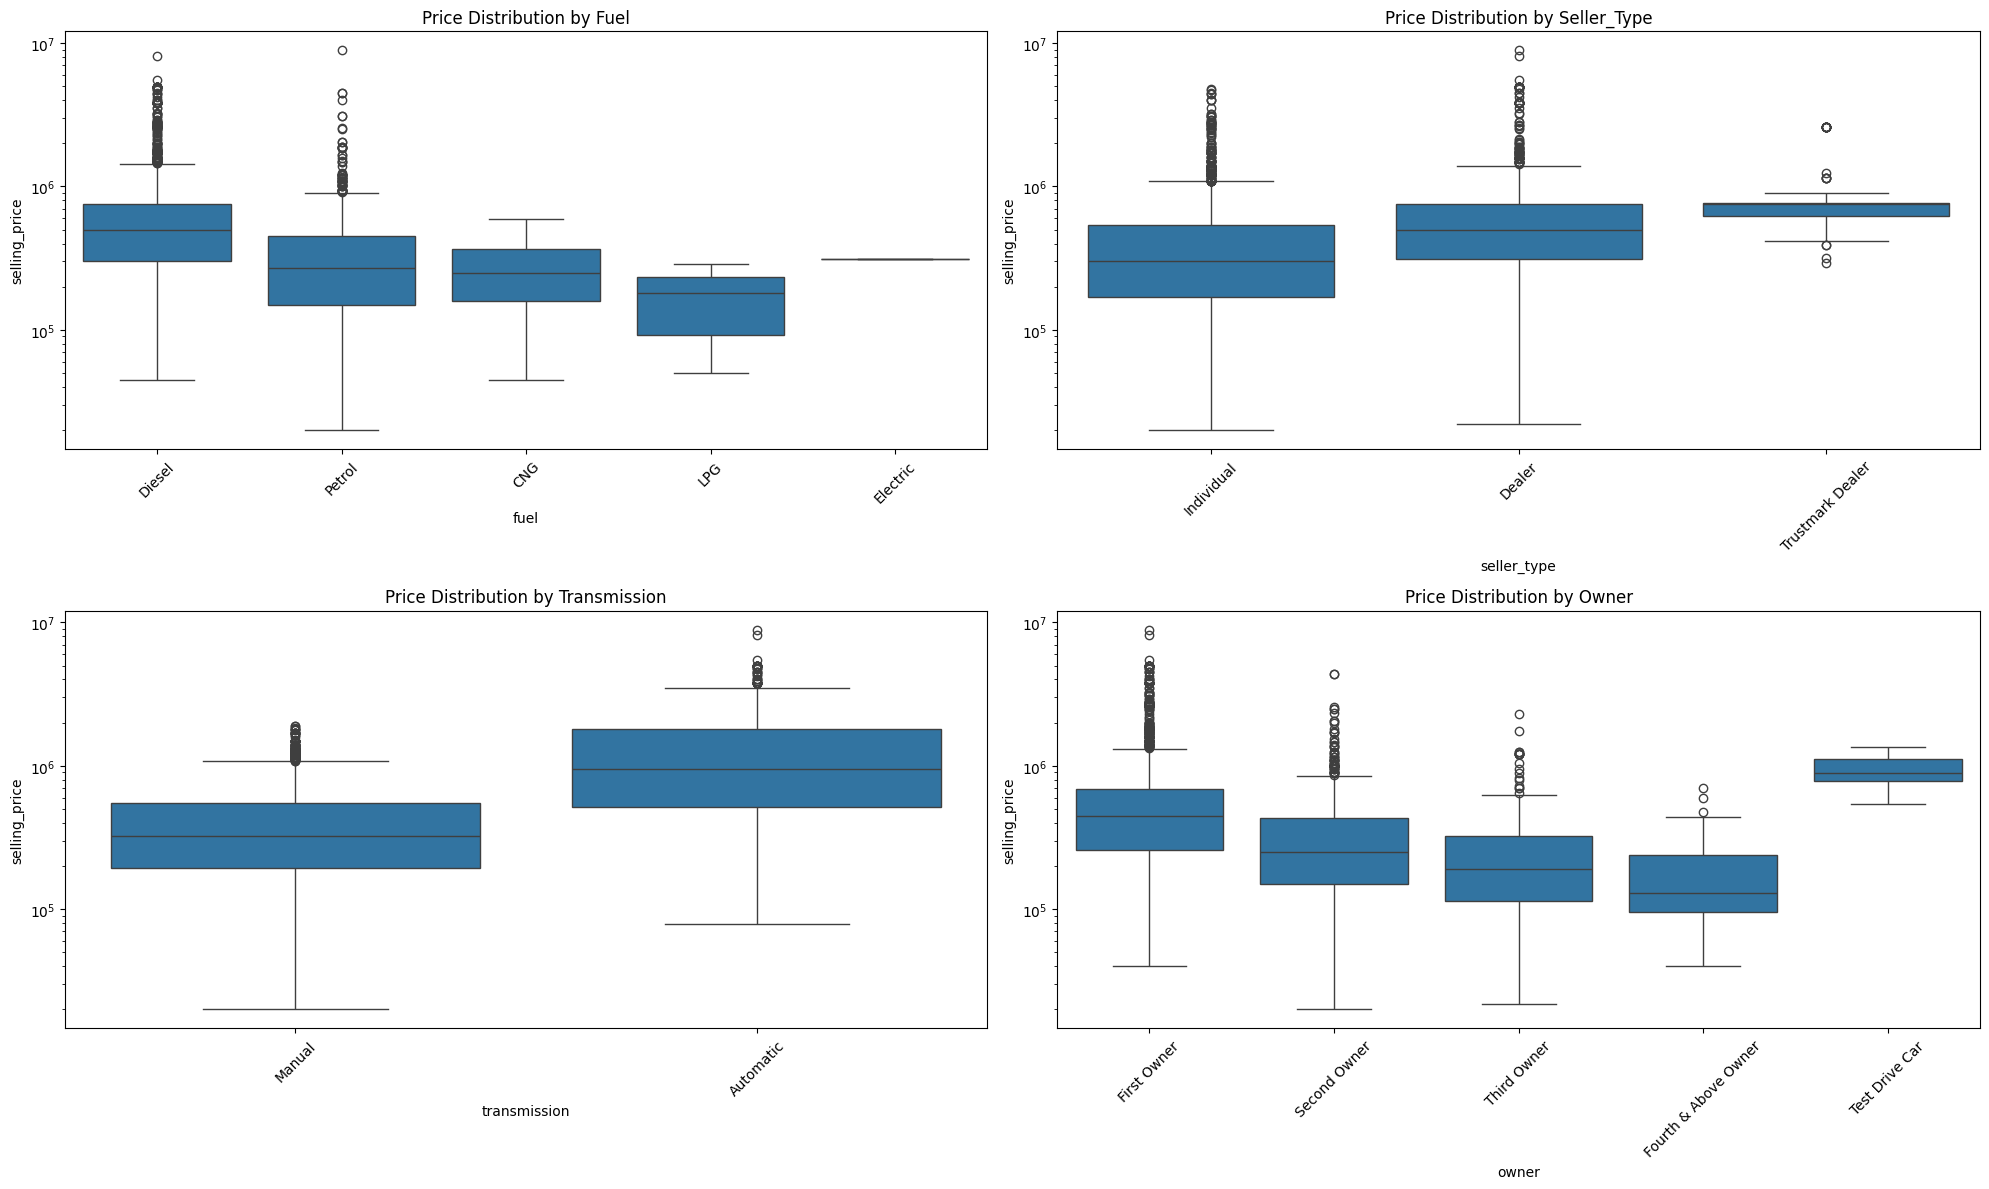

In [47]:
plt.figure(figsize=(20, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, y='selling_price', data=df,
                order=df[col].value_counts().index)
    plt.title(f'Price Distribution by {col.title()}')
    plt.xticks(rotation=45)
    plt.yscale('log')
plt.tight_layout()
plt.show()

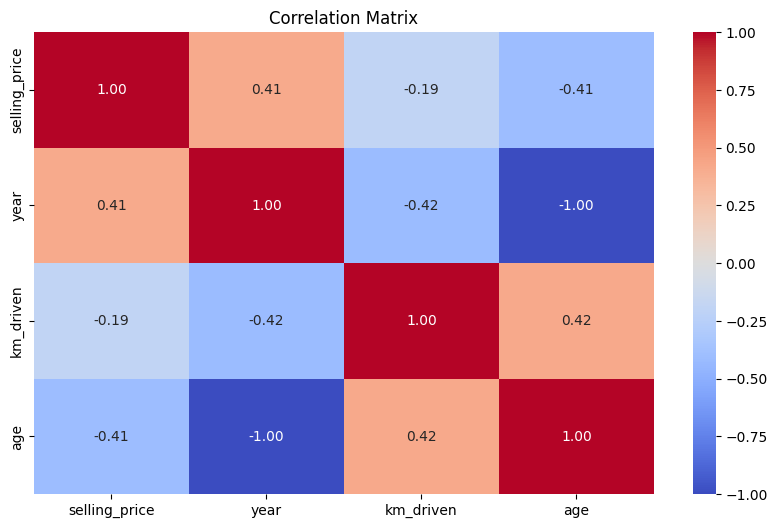

In [48]:
corr_matrix = df[['selling_price', 'year', 'km_driven', 'age']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


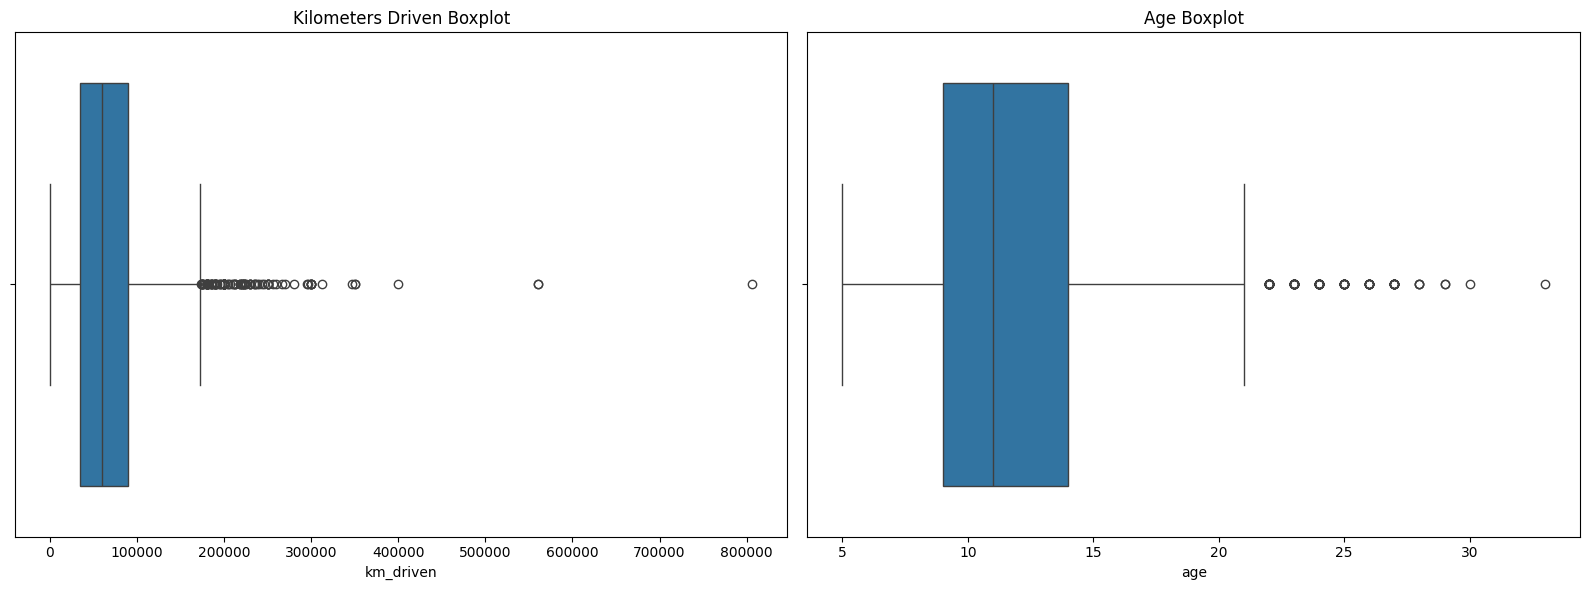

In [49]:
# 7. Outlier Analysis
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['km_driven'])
plt.title('Kilometers Driven Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['age'])
plt.title('Age Boxplot')
plt.tight_layout()
plt.show()

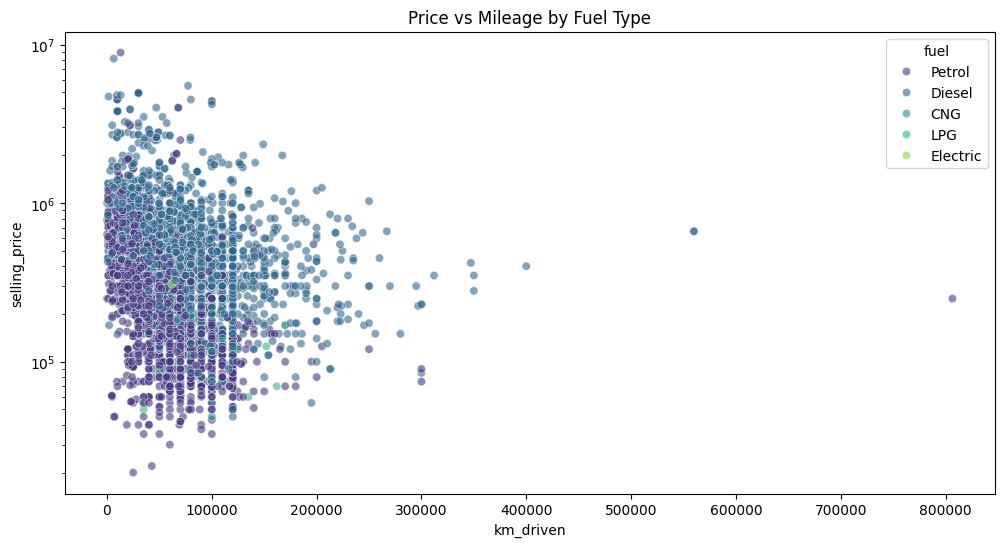

In [50]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='km_driven', y='selling_price', hue='fuel',
                data=df, alpha=0.6, palette='viridis')
plt.yscale('log')
plt.title('Price vs Mileage by Fuel Type')
plt.show()

In [53]:
df.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
brand,0
age,0


In [55]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand', 'age'],
      dtype='object')

In [56]:
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,18


In [63]:
len(df['brand'].unique())

29

In [64]:
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [68]:
print(len(df['name']))
print(len(df))

4340
4340


In [69]:
#useful rows  age, km_driven, fuel, seller_type, transmission, owner, brand
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['fuel'] = label_encoder.fit_transform(df['fuel'])
df['seller_type'] = label_encoder.fit_transform(df['seller_type'])
df['transmission'] = label_encoder.fit_transform(df['transmission'])
df['owner'] = label_encoder.fit_transform(df['owner'])
df['brand'] = label_encoder.fit_transform(df['brand'])

In [70]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,age
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,18,18
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,18,18
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,10,13
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,5,8
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,9,11


In [106]:
scaler = StandardScaler()
df[['selling_price', 'year', 'km_driven', 'age']] = scaler.fit_transform(df[['selling_price', 'year', 'km_driven', 'age']])

In [107]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand', 'age'],
      dtype='object')

<Axes: >

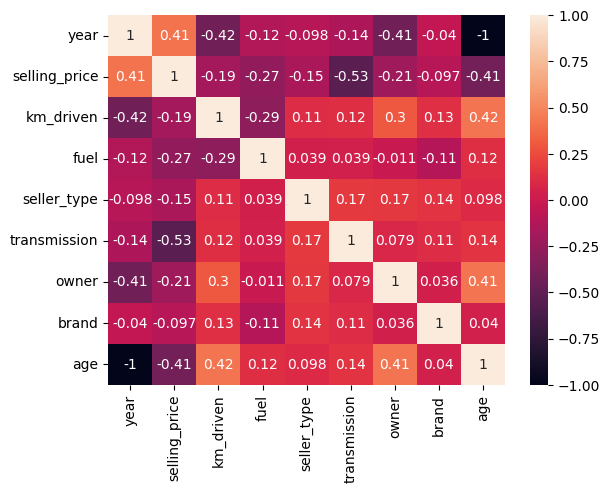

In [108]:
sns.heatmap(df.drop(columns = ['name']).corr(), annot=True)

In [109]:
#It can be stated that, selling_price is mainly determined by age,kms_driven,fuel type, transmission
#and lesser by the brand it belongs to

In [110]:
X = df.drop(['selling_price','name','year'] ,axis = 1)
y = df['selling_price']

<Axes: >

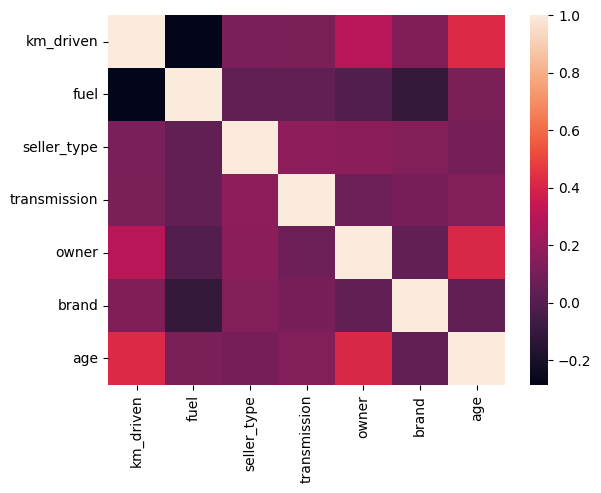

In [111]:
sns.heatmap(X.corr())

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
l = LinearRegression()
l.fit(X_train,y_train)

LinearRegression()

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 13 is smaller than n_iter=100. Running 13 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters found:  {'alpha': 1.0}


In [118]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
ridge.score(X_test,y_test)

0.3980367839056388

In [113]:
l.score(X_test,y_test)

0.3978400580194451

In [114]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = l.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [115]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [116]:
print(r2,mse,rmse)

0.3978400580194451 0.5491288826678004 0.7410323087880855


In [121]:
# # prompt: use random forests regressor and perform randomized search cv to find best hyperparameters

# # Assuming X_train, X_test, y_train, y_test are defined from the previous code

# # Define the parameter distribution for RandomForestRegressor
# param_dist_rf = {
#     'n_estimators': [100, 150, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2'],
#     'bootstrap': [True, False]
# }

# # Initialize RandomForestRegressor
# rf_regressor = RandomForestRegressor(random_state=42)

# # Perform RandomizedSearchCV
# random_search_rf = RandomizedSearchCV(
#     estimator=rf_regressor,
#     param_distributions=param_dist_rf,
#     n_iter=50,  # Number of parameter settings sampled
#     cv=5,  # Number of cross-validation folds
#     scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
#     n_jobs=-1,  # Use all available processors
#     random_state=42,
#     verbose=1
# )


# random_search_rf.fit(X_train, y_train)

# # Print the best hyperparameters and score
# print("Best parameters for Random Forest:", random_search_rf.best_params_)
# print("Best score for Random Forest:", random_search_rf.best_score_)

# # Evaluate the best model
# best_rf_model = random_search_rf.best_estimator_
# y_pred = best_rf_model.predict(X_test)
# r2 = r2_score(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)

# print(f"R-squared: {r2}")
# print(f"RMSE: {rmse}")
# print(f"MSE: {mse}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': False}
Best score for Random Forest: -0.23797292184357427
R-squared: 0.6831560518184403
RMSE: 0.5375315019597231
MSE: 0.28894011559907584


In [138]:
rfr = RandomForestRegressor(n_estimators =97,min_samples_split=3,min_samples_leaf = 2,max_depth = 27)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=27, min_samples_leaf=2, min_samples_split=3,
                      n_estimators=97)

In [139]:
y_pred = rfr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [140]:
r2,mse,rmse

(0.6609838223338143, 0.30915967979509446, 0.5560212943719822)

In [131]:
# Catboost for categorical data

In [141]:
# prompt: use randomized search cv to catboost

!pip install catboost

from catboost import CatBoostRegressor

# Assuming X_train, X_test, y_train, y_test are defined from the previous code

# Define the parameter distribution for CatBoostRegressor
param_dist_catboost = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.03, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128],
    'random_strength': [1, 5, 10],
    'bagging_temperature': [0, 0.5, 1]
}

# Identify categorical features
categorical_features_indices = np.where(X_train.dtypes != np.float64)[0]

# Initialize CatBoostRegressor
catboost_regressor = CatBoostRegressor(
    loss_function='RMSE',  # Or another appropriate loss function
    random_seed=42,
    verbose=100, # Control the verbosity of the training process
    cat_features=categorical_features_indices # Pass the indices of categorical features
)

# Perform RandomizedSearchCV
random_search_catboost = RandomizedSearchCV(
    estimator=catboost_regressor,
    param_distributions=param_dist_catboost,
    n_iter=50,  # Number of parameter settings sampled
    cv=5,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
    n_jobs=-1,  # Use all available processors
    random_state=42,
    verbose=1
)

random_search_catboost.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best parameters for CatBoost:", random_search_catboost.best_params_)
print("Best score for CatBoost:", random_search_catboost.best_score_)

# Evaluate the best model
best_catboost_model = random_search_catboost.best_estimator_
y_pred = best_catboost_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.6 MB/s eta 0:00:00
Fitting 5 folds for each of 50 candidates, totalling 250 fits
0:	learn: 0.9587649	total: 51.2ms	remaining: 10.2s
100:	learn: 0.3997093	total: 309ms	remaining: 303ms
199:	learn: 0.2909727	total: 627ms	remaining: 0us
Best parameters for CatBoost: {'random_strength': 10, 'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 200, 'depth': 8, 'border_count': 128, 'bagging_temperature': 0.5}
Best score for CatBoost: -0.1806822691777727
R-squared: 0.7356360396393443
RMSE: 0.4910009558213846
MSE: 0.2410819386175133


In [143]:
catboost_regressor = CatBoostRegressor(
    loss_function='RMSE',  # Or another appropriate loss function
    random_seed=42,
    verbose=100, # Control the verbosity of the training process
    cat_features=categorical_features_indices,
    iterations = 200,
    learning_rate = 0.1,
    depth = 8,
    random_strength = 10,
    bagging_temperature = 0.5,
    l2_leaf_reg = 3,
)

In [144]:
catboost_regressor.fit(X_train, y_train)
y_pcb = catboost_regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pcb))
r2 = r2_score(y_test, y_pcb)
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

0:	learn: 0.9536104	total: 3.93ms	remaining: 782ms
100:	learn: 0.3886806	total: 333ms	remaining: 326ms
199:	learn: 0.2850842	total: 761ms	remaining: 0us
R-squared: 0.7264527696192566
RMSE: 0.4994561600790699


In [146]:
mean_squared_error(y_test, y_pcb)

0.24945645584092951